In [2]:
% run __init__.py
% matplotlib inline

In [ ]:
con = pg2.connect(host='34.211.227.227',
                   dbname='postgres',
                   user='postgres')
cur = con.cursor(cursor_factory=RealDictCursor)


In [ ]:
cur.execute('SELECT _id,  feat_028,  feat_048,  feat_064, feat_105, feat_128, feat_153, feat_241, feat_281, feat_318, feat_336, feat_\
            feat_338, feat_378, feat_433,\
            feat_442, feat_451, feat_453, feat_455, feat_472, feat_475, feat_493, target FROM madelon ORDER BY random() LIMIT 100000;')

In [ ]:
data = cur.fetchall()

In [ ]:
con.close()

In [ ]:
Mad_data = pd.DataFrame(data)
Mad_data.to_pickle('../Mad_feat_data.p')

In [ ]:
output = open('Mad__feat_data', 'wb')
pickle.dump(mydict, output)
output.close()

In [3]:
Madelon = pd.read_pickle('./data/Mad_feat_data.p',)

In [4]:
Madelon.head()

,_id,feat_257,feat_269,feat_308,feat_315,feat_336,feat_341,feat_395,feat_504,feat_526,...,feat_701,feat_724,feat_736,feat_769,feat_808,feat_829,feat_867,feat_920,feat_956,target
0,170866,0.252421,3.059553,0.549202,1.505400,0.558945,2.649557,0.918241,0.773806,0.260477,...,-2.694026,-1.714143,0.688705,-0.780640,-0.162773,2.598932,1.171268,-2.489237,0.226046,0
1,90554,1.353174,0.260890,-2.233127,1.034565,1.351185,0.452291,-0.229178,1.502204,1.815267,...,-1.656428,1.125663,1.378048,1.882807,-1.209783,3.086035,0.069695,-1.371033,0.345675,0
2,44817,-0.778791,-4.338013,-1.926604,-1.470901,-0.409953,-3.527393,-0.402595,-0.275500,-0.217137,...,3.651437,1.867085,-0.056123,1.451549,0.366022,-3.556293,-1.848013,3.627442,-0.543230,0
3,13966,-1.311862,1.530704,0.921769,1.067135,-1.778740,-0.604283,-0.020201,-1.120061,0.361306,...,-1.633790,-1.029503,-0.609389,-0.366483,0.820188,-1.474820,1.439293,-0.415038,-1.506730,1
4,189542,1.972786,1.694196,-3.190931,0.102184,4.204283,1.477417,0.429671,-2.264772,1.107840,...,-0.449825,2.311717,3.197871,-1.011152,-3.580152,1.401875,-2.381935,1.252636,0.583428,1


In [5]:
Madelon = Madelon.set_index('_id')
Madelon = Madelon.reset_index(drop = True)

In [6]:
Madelon.head()

,feat_257,feat_269,feat_308,feat_315,feat_336,feat_341,feat_395,feat_504,feat_526,feat_639,...,feat_701,feat_724,feat_736,feat_769,feat_808,feat_829,feat_867,feat_920,feat_956,target
0,0.252421,3.059553,0.549202,1.505400,0.558945,2.649557,0.918241,0.773806,0.260477,0.291553,...,-2.694026,-1.714143,0.688705,-0.780640,-0.162773,2.598932,1.171268,-2.489237,0.226046,0
1,1.353174,0.260890,-2.233127,1.034565,1.351185,0.452291,-0.229178,1.502204,1.815267,0.758823,...,-1.656428,1.125663,1.378048,1.882807,-1.209783,3.086035,0.069695,-1.371033,0.345675,0
2,-0.778791,-4.338013,-1.926604,-1.470901,-0.409953,-3.527393,-0.402595,-0.275500,-0.217137,-0.298457,...,3.651437,1.867085,-0.056123,1.451549,0.366022,-3.556293,-1.848013,3.627442,-0.543230,0
3,-1.311862,1.530704,0.921769,1.067135,-1.778740,-0.604283,-0.020201,-1.120061,0.361306,-1.790795,...,-1.633790,-1.029503,-0.609389,-0.366483,0.820188,-1.474820,1.439293,-0.415038,-1.506730,1
4,1.972786,1.694196,-3.190931,0.102184,4.204283,1.477417,0.429671,-2.264772,1.107840,0.606318,...,-0.449825,2.311717,3.197871,-1.011152,-3.580152,1.401875,-2.381935,1.252636,0.583428,1


In [7]:
X = Madelon.drop('target', axis = 1)
y = Madelon['target']

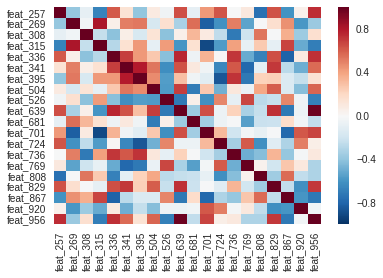

In [8]:
sns.heatmap(X.corr())

In [9]:
def fit_benchmark_model(X, y, model, name):
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    #scale the data
    scaler = StandardScaler()
    # Fit_transform
    X_train_scaled = scaler.fit_transform(X_train)
    # transform
    X_test_scaled = scaler.transform(X_test)
    
    model.fit(X_train_scaled, y_train)
    return (name, model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))

In [10]:
fit_benchmark_model(X, y, LogisticRegression(C = 100), 'Logistic Regression')


('Logistic Regression', 0.6057866666666667, 0.60236000000000001)

In [11]:
fit_benchmark_model(X, y, KNeighborsClassifier(), 'KNN')


('KNN', 0.89532, 0.84719999999999995)

In [12]:
fit_benchmark_model(X, y, DecisionTreeClassifier(), 'Decision tree')


('Decision tree', 1.0, 0.78664000000000001)

In [13]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.explained_variance_ratio_


array([ 0.36623852,  0.31958935,  0.13661047,  0.10214676,  0.0754149 ])

In [15]:
sum(pca.explained_variance_ratio_) #can account for all variance

1.0000000000000002

In [20]:
Pca2 = pca.transform(X)
Pca2 = pd.DataFrame(Pca2)

In [22]:
Pca2.head()

,0,1,2,3,4
0,-2.891259,5.337793,-0.947714,2.929660,0.957752
1,-1.767752,0.109046,-3.089020,4.319057,-3.437743
2,3.317885,-6.877330,1.646832,-4.005892,-3.684275
3,3.452949,3.510341,1.016122,-0.401200,1.229671
4,-3.375817,-0.796536,-8.114928,-1.756004,-0.526231


In [30]:
Important = ['feat_257', 'feat_308', 'feat_341', 'feat_504', 'feat_526'\
             , 'feat_681', 'feat_736', 'feat_769', 'feat_808', 'feat_829', 'feat_920']
X= X[Important]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

### KNN

In [35]:

knc_params = {
        'n_neighbors':[3,4,5,6,7,8,9,10]
    }

knc_gs = GridSearchCV(KNeighborsClassifier(), param_grid= knc_params, cv=5)
knc_gs.fit(X_train, y_train)
knc_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [36]:
knc_gs.score(X_train, y_train), knc_gs.score(X_test, y_test)

(0.88104000000000005, 0.84940000000000004)

### Random Forests

In [51]:
Rf_params = {
    'n_estimators':[100],
    'max_features':['auto']
}

Rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=Rf_params, cv=5,n_jobs=-1)
Rf_gs.fit(X_train, y_train)
Rf_gs.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [50]:
 Rf_gs.score(X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### PCA'd GS

In [52]:
X_train, X_test, y_train, y_test = train_test_split(Pca2, y, random_state = 42)

In [53]:
knc_params = {
        'n_neighbors':[3,4,5,6,7,8,9,10]
    }

knc_gs = GridSearchCV(KNeighborsClassifier(), param_grid= knc_params, cv=5)
knc_gs.fit(X_train, y_train)
knc_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [54]:
knc_gs.score(X_train, y_train), knc_gs.score(X_test, y_test)

(0.88533333333333331, 0.84855999999999998)

In [55]:
Rf_params = {
    'n_estimators':[100],
    'max_features':['auto']
}

Rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=Rf_params, cv=5,n_jobs=-1)
Rf_gs.fit(X_train, y_train)
Rf_gs.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [59]:
 Rf_gs.score(X_train, y_train),  Rf_gs.score(X_test, y_test)

(1.0, 0.85152000000000005)